In [1]:
library(tidyr)
library(dplyr)
library(limma)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/data/protein")

In [4]:
# 读取数据
ID=read.table("256sample_mutation_paired_clinical_filter_adjust.csv", header = TRUE, sep = ",", quote="\"")
phospho<- unique(read.table("Phospho protein expression.csv", sep = ",", header=T,quote="\"",na.strings = "NaN",check.names = FALSE))
protein_ID=read.table("proteinID_ID.csv", header = TRUE, sep = ",", quote="")

In [10]:
print(head(protein_ID))

  Protein.ID      ID    class
1          1 1382824 adjacent
2          2 1384461 adjacent
3          3 1384925 adjacent
4          4 1385026 adjacent
5          5 1385089 adjacent
6          6 1385300 adjacent


In [5]:
gene=unique(ID$Gene.MT_ensGene)
print(gene)

 [1] "RNR1"      "tRNA-Phe"  "tRNA-Pro"  "CYTB"      "tRNA-Thr"  "ATP6"     
 [7] "ND5"       "ND1"       "tRNA-Ile"  "ND2"       "tRNA-Trp"  "tRNA-Asn" 
[13] "tRNA-Cys"  "COX1"      "tRNA-Tyr"  "tRNA-Ala"  "RNR2"      "ND3"      
[19] "COX3"      "ND4L"      "ND4"       "ND6"       "tRNA-Lys"  "tRNA-Ser1"
[25] "ATP8"      "tRNA-Asp"  "COX2"      ""          "tRNA-Val"  "tRNA-Leu1"
[31] "tRNA-Leu2" "tRNA-His"  "tRNA-Glu"  "tRNA-Ser2" "tRNA-Arg" 


In [7]:
selected_ID=unique(merge(ID[,1],protein_ID,by.x=1,by.y=2))

In [9]:
print(head(selected_ID))

         x Protein.ID    class
1  1276016        189    tumor
6  1286797        262 adjacent
7  1286797        263    tumor
12 1287996        269 adjacent
16 1288251        258    tumor
17 1288251        259 adjacent


In [136]:
write.table(selected_ID,"selected_ID.csv",sep=",",quote=F,row.names=F)

In [11]:
head(phospho)

,protein,1,2,3,4,5,6,7,8,9,⋯,302,304,312,328,329,331,339,340,359,361
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LV861,NA,NA,NA,NA,NA,2.588470,1.984503,NA,NA,⋯,NA,1,NA,NA,2.117966,1.720223,3.433546,1.000000,NA,NA
2,LVX54,NA,NA,11.578517,5.827733,3.255029,NA,NA,17.056515,NA,⋯,4.08322,NA,5.716533,1.335225,10.114029,5.209229,12.472736,7.973312,NA,NA
3,LV39;LV321,8.714639,31.447546,16.573811,51.290588,1.607325,38.807640,112.603348,108.065575,41.04501,⋯,11.35713,NA,18.069815,6.856028,14.984043,7.918900,17.236618,43.797813,2.644574,14.94174
5,HV404;HV432;HV461;HV439;HV459;HV434;HVD34;HV431;HVD82,3.991640,5.059260,6.527117,3.609790,3.223819,2.721822,8.942517,NA,5.91544,⋯,NA,NA,NA,NA,1.557781,1.670715,NA,NA,NA,NA
6,KVD29;KV229,1.757699,5.756793,3.517524,4.528871,2.409953,1.000000,NA,1.509513,NA,⋯,NA,NA,NA,NA,1.545505,NA,1.691582,1.700250,1.097809,NA
8,CC187,12.935989,NA,3.051807,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,1.000000,NA,NA,NA,NA,NA


In [12]:
selected_columns<- c(1,which(colnames(phospho) %in% selected_ID$Protein.ID))

In [13]:
length(selected_columns)

[1] 224

In [14]:
phospho_data=phospho[,selected_columns]

In [15]:
head(phospho_data)

,protein,1,2,3,4,6,8,9,10,11,⋯,299,300,302,304,312,328,329,339,340,359
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LV861,NA,NA,NA,NA,2.588470,NA,NA,1.000000,NA,⋯,1.000000,NA,NA,1,NA,NA,2.117966,3.433546,1.000000,NA
2,LVX54,NA,NA,11.578517,5.827733,NA,17.056515,NA,12.980451,NA,⋯,NA,7.095086,4.08322,NA,5.716533,1.335225,10.114029,12.472736,7.973312,NA
3,LV39;LV321,8.714639,31.447546,16.573811,51.290588,38.807640,108.065575,41.04501,23.120007,NA,⋯,16.475958,34.018059,11.35713,NA,18.069815,6.856028,14.984043,17.236618,43.797813,2.644574
5,HV404;HV432;HV461;HV439;HV459;HV434;HVD34;HV431;HVD82,3.991640,5.059260,6.527117,3.609790,2.721822,NA,5.91544,NA,NA,⋯,NA,4.059712,NA,NA,NA,NA,1.557781,NA,NA,NA
6,KVD29;KV229,1.757699,5.756793,3.517524,4.528871,1.000000,1.509513,NA,3.937127,1,⋯,2.254509,NA,NA,NA,NA,NA,1.545505,1.691582,1.700250,1.097809
8,CC187,12.935989,NA,3.051807,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,1.000000,NA,NA,NA


In [11]:
dim(phospho_data)

[1] 5336  224

In [16]:
# 分离带有分号的基因
df_separated <- phospho_data %>%
  distinct(protein, .keep_all = TRUE) %>%
  separate_rows(protein, sep = ";")

In [13]:
dim(df_separated)

[1] 5473  224

In [17]:
df_mean <- df_separated %>%
  group_by(protein) %>%
  summarise(across(everything(), mean))

In [15]:
dim(df_mean)

[1] 5473  224

In [18]:
df_mean=as.data.frame(df_mean)

In [19]:
# 转换第一列为字符类型
first_column <- df_mean[, 1]

# 设置行名
rownames(df_mean) <- first_column

# 删除第一列（可选）
df_mean_new <- df_mean[, -1]

In [20]:
##分位数标准化
expression_numeric <- as.matrix(df_mean_new)
qn_matrix <- normalizeBetweenArrays(expression_numeric, method = "quantile")
dimnames(qn_matrix) <- dimnames(df_mean_new)

In [21]:
print(head(qn_matrix))

               1          2          3          4          6          8
1-Mar    1.07477   1.358467   1.062583   1.068009   1.203185         NA
10-Sep        NA   1.895357   1.062583         NA   1.203185   1.722148
11-Sep  33.18025  29.353082  25.742377  32.555338  41.651290  20.920736
1433B  334.80897 516.533889 333.136767 200.924715 444.776477 195.385728
1433E  138.46382 254.657913 146.399895 113.323656 234.129718  75.572924
1433F   67.91937 129.102865 112.478338  97.672842 187.722783  43.763440
                9         10        11         12         13         14
1-Mar          NA   1.468907   1.06889   1.044834   1.108213         NA
10-Sep   1.457329   2.338575        NA         NA   1.669971   2.705355
11-Sep  39.657836  28.695836  26.90996  31.690272  29.489473  32.381017
1433B  268.719209 163.676961 204.77949 117.855881 237.898943 307.658747
1433E  154.846360 112.850474 155.31546  92.787563 169.048092 133.813053
1433F  132.197052  29.717999  98.28477  29.632705  83.487529 178

In [156]:
write.table(qn_matrix,"normalized_phospho_expression.csv",sep=",",quote=F)

In [22]:
filtered_qn_matrix <- qn_matrix[rownames(qn_matrix) %in% gene, ]

In [23]:
print(filtered_qn_matrix)

            1         2        3        4        6        8         9        10
COX2 56.07022 149.70293 14.38968 15.88798 34.95309 18.15635 20.598245 30.179127
COX3  1.07477        NA       NA       NA       NA       NA        NA        NA
CYTB 12.27503  28.81326 12.06741 11.51828 17.94851  6.14738  9.491446  7.010284
            11        12       13        14       15        16       17
COX2 14.373575 38.692028 9.568255 15.180005 55.06221 13.156548 14.53677
COX3        NA        NA       NA        NA       NA        NA       NA
CYTB  2.518321  2.731708 9.891054  4.956973 19.53129  2.973861  4.58799
            19        21       22       23       24       25         26
COX2 21.869654 34.213693 28.35254 1.131582  1.18312 14.06832 187.088876
COX3        NA  1.155761       NA       NA       NA       NA   9.985713
CYTB  8.046694 12.275152 11.88047 1.033274 23.15621 15.35342  22.044115
           27        28       29        30       31        32       33
COX2 1.220360 19.569542 5.856282 

In [24]:
final_phospho=t(filtered_qn_matrix)
# 将行名转为第一列
final_phospho <- cbind(Protein = rownames(final_phospho), final_phospho)

# 可选：删除原有行名
rownames(final_phospho) <- NULL

In [25]:
print(dim(final_phospho))

[1] 223   4


In [26]:
print(head(protein_ID))

  Protein.ID      ID    class
1          1 1382824 adjacent
2          2 1384461 adjacent
3          3 1384925 adjacent
4          4 1385026 adjacent
5          5 1385089 adjacent
6          6 1385300 adjacent


In [27]:
final_phospho_class=merge(final_phospho,protein_ID,by.x=1,by.y=1)
final_phospho_class=final_phospho_class[,c(1,5,6,2:4)]

In [28]:
print(head(final_phospho_class))

  Protein      ID    class             COX2             COX3             CYTB
1       1 1382824 adjacent 56.0702228742851 1.07477032481355 12.2750266244968
2      10 1388422 adjacent 30.1791271414963             <NA>  7.0102842616179
3     100 1423797 adjacent             <NA>             <NA>  6.2347670862871
4     101 1423797    tumor 4.58692130317497             <NA>  15.576953670292
5     104 1423922 adjacent 2.74528536822804             <NA> 11.7029220839082
6     105 1423922    tumor 15.2293960810544             <NA> 6.07919372074752


In [29]:
write.table(final_phospho_class,"phospho_ID_class_selected_protein_expression.csv",sep=",",quote=F,row.names=F)

In [33]:
filtered_data <- final_phospho_class %>%
  group_by(ID) %>%
  filter(any(class == "adjacent") & any(class == "tumor")) %>%
  ungroup() %>%
  arrange(ID)

In [35]:
print(tail(filtered_data))

# A tibble: 6 × 6
  Protein      ID class    COX2             COX3             CYTB            
  <chr>     <int> <chr>    <chr>            <chr>            <chr>           
1 332     1487335 tumor    7.4160585476393  NA               117.083107581717
2 358     1487335 adjacent 10.2620070966337 NA               20.0697529362607
3 305     1487754 tumor    66.2955060544882 10.5000973226781 180.827907184925
4 325     1487754 adjacent 10.6765812677794 NA               51.6194205273066
5 306     1489409 tumor    45.3021379141913 1.15912208415783 13.8575578248925
6 359     1489409 adjacent 35.3543480025343 NA               42.271592556241 


In [36]:
write.table(filtered_data,"phospho_ID_class_selected_protein_expression_paired samples.csv",sep=",",quote=F,row.names=F)

In [37]:
tumor_data <- final_phospho_class %>%
  filter(class == "tumor")

In [38]:
print(head(tumor_data))

  Protein      ID class             COX2             COX3             CYTB
1     101 1423797 tumor 4.58692130317497             <NA>  15.576953670292
2     105 1423922 tumor 15.2293960810544             <NA> 6.07919372074752
3     107 1423930 tumor 34.6081470698254             <NA> 9.91538667270268
4     109 1424570 tumor 8.98126840312284             <NA> 1.82513007505782
5     111 1424579 tumor 7.95894810554417             <NA> 18.3398929206392
6     113 1424622 tumor 5.49098106167336 1.28636580342088 9.67771980177232


In [39]:
write.table(tumor_data,"phospho_ID_class_selected_protein_expression tumor samples.csv",sep=",",quote=F,row.names=F)

In [27]:
final_phospho_long <- final_phospho_class %>%
  pivot_longer(cols = c(COX2, COX3, CYTB),  # 选择需要转为窄格式的列
               names_to = "Gene",        # 新列名，用于存放基因名
               values_to = "Expression") # 新列名，用于存放表达值

In [28]:
head(final_phospho_long)

Protein,ID,class,Gene,Expression
<chr>,<int>,<chr>,<chr>,<chr>
1,1382824,adjacent,COX2,56.0702228742851
1,1382824,adjacent,COX3,1.07477032481355
1,1382824,adjacent,CYTB,12.2750266244968
10,1388422,adjacent,COX2,30.1791271414963
10,1388422,adjacent,COX3,NA
10,1388422,adjacent,CYTB,7.0102842616179


Warning message:
“Removed 199 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


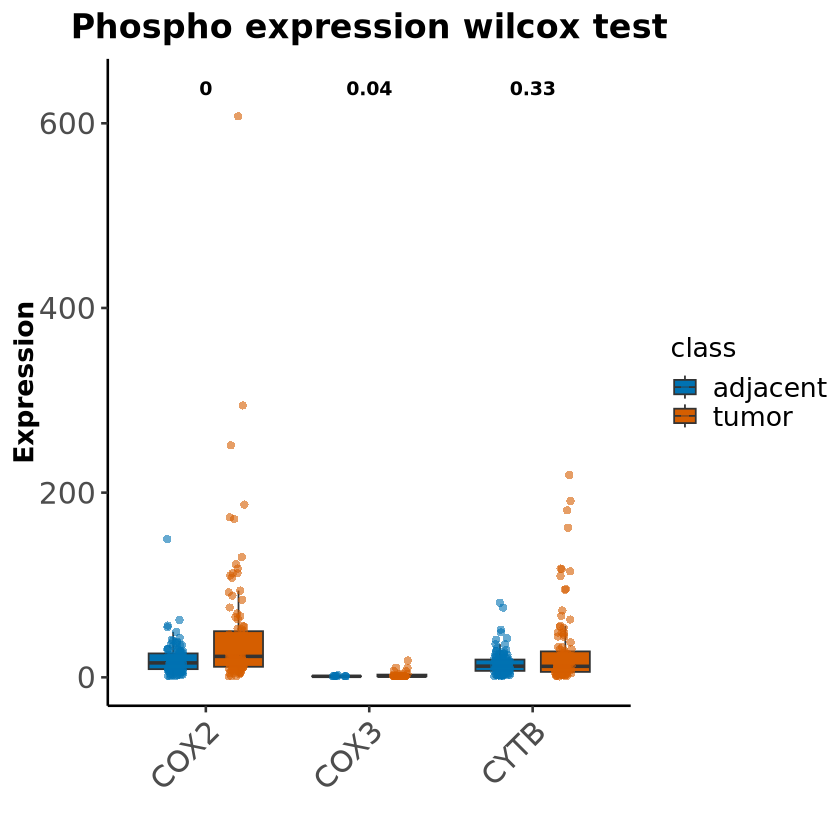

In [29]:
library(ggplot2)
library(ggpubr)
library(dplyr)

# 自定义配色
custom_colors <- c("adjacent" = "#0072B2", "tumor" = "#D55E00")
final_phospho_long$class <- as.factor(final_phospho_long$class)

# 确保 Expression 列为数值型
final_phospho_long$Expression <- as.numeric(as.character(final_phospho_long$Expression))

# 1. 计算每个 Gene 的 p 值
p_value <- final_phospho_long %>%
  filter(class %in% c("adjacent", "tumor")) %>%
  group_by(Gene) %>%
  summarise(
    p_value = tryCatch(
      wilcox.test(Expression ~ class, exact = FALSE)$p.value,
      error = function(e) NA
    ),
    .groups = 'drop'
  ) %>%
  arrange(p_value)

# 2. 设置 Gene 的因子顺序
final_phospho_long$Gene <- factor(final_phospho_long$Gene, levels = p_value$Gene)

# 3. 将 P 值转为字符，准备在图中显示
p_value_labels <- paste0("", round(p_value$p_value, 2))

# 4. 绘图
p <- ggplot(final_phospho_long, aes(x = Gene, y = Expression, fill = class)) +
  geom_boxplot(outlier.shape = NA, width = 0.6, position = position_dodge(0.8)) +
  geom_jitter(aes(color = class), size = 2, alpha = 0.6, shape = 16,
              position = position_jitterdodge(jitter.width = 0.2)) +
  scale_fill_manual(values = custom_colors) +
  scale_color_manual(values = custom_colors) +
  theme_classic(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 18),
    axis.text.y = element_text(size = 18),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20)
  ) +
  labs(title = "Phospho expression wilcox test",
       x = "",
       y = "Expression")

# 添加 P 值到相应位置
for (i in 1:nrow(p_value)) {
  p <- p + annotate("text", 
                    x = i, 
                    y = max(final_phospho_long$Expression, na.rm = TRUE) * 1.05, 
                    label = p_value_labels[i], 
                    size = 4, fontface = "bold", hjust = 0.5)
}

# 显示图形
print(p)

In [30]:
p_value

Gene,p_value
<chr>,<dbl>
COX2,0.0004267036
COX3,0.0403644308
CYTB,0.3338509498


In [31]:
ggsave("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/plots/phospho expression_wilcox_sortP_625.pdf", plot = p, width = 8, height = 8,dpi=300)

Warning message:
“Removed 199 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”
